# PCA - Principal Component Analysis

- PCA is not a full machine learning algorithm.
- It is an unsupervised learning algorithm.
- PCA only reduces the dimensions and then you can use a machine learning algorithm to classify the data

## Libraries

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Load the Data
- I'm picking the simple cancer data as it has many features.
- The cancer data can be obtained from sklearn.datasets
- And then we can reduce the dimesion to n of dimension
- Finally, we will use dimension reduced data to classify using a machine learning algorithm.

In [138]:
from sklearn.datasets import load_breast_cancer

In [139]:
cancer_df = load_breast_cancer()

In [140]:
# Using cancer.keys(), we can access the keys 
cancer_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [141]:
# # DESCR gives a pretty good explanation of the dataset
# print(cancer['DESCR'])

In [142]:
# Create a dataframe using the data and the column names
df = pd.DataFrame(cancer_df['data'],columns=cancer_df['feature_names'])

In [143]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- As you can see, there are 30 features in this dataset, all contributing to the final decision.
- The label is not added to this dataframe.

## Standardize the data

- As we've noticed before it is difficult to visualize high dimensional data.
- we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. 
- Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [146]:
scaled_data = scaler.transform(df)

## Transform Data with PCA

- We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

- We can also specify how many components we want to keep when creating the PCA object.

In [147]:
from sklearn.decomposition import PCA

In [148]:
# We reduce the 30 dimensions into 2 dimensions
pca = PCA(n_components=2)

In [149]:
pca.fit(scaled_data)

PCA(n_components=2)

- Now we can transform this data to its first 2 principal components.

In [150]:
x_pca = pca.transform(scaled_data)

In [151]:
# Shape of the Original Data
scaled_data.shape

(569, 30)

In [152]:
# Shape of the transformed data
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

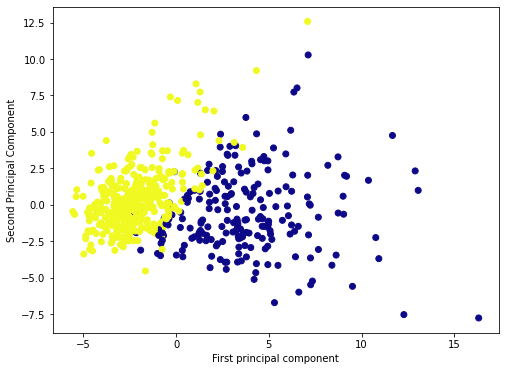

In [153]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer_df['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [154]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [155]:
df_comp = pd.DataFrame(pca.components_,columns=cancer_df['feature_names'])

<AxesSubplot:>

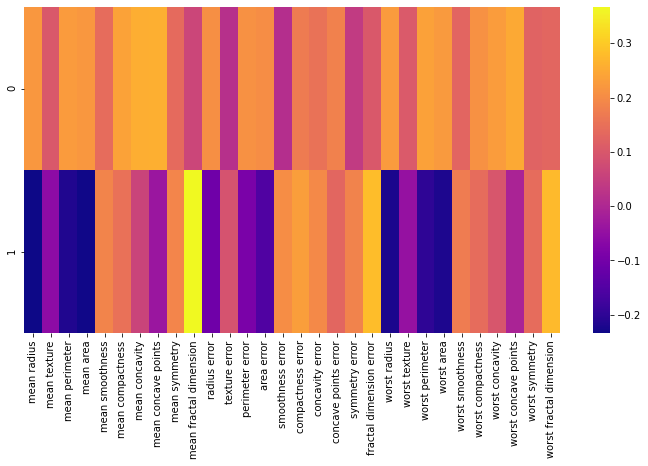

In [156]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

## Split the DATA

In [157]:
X = x_pca
y = cancer_df['target']

In [158]:
X.shape

(569, 2)

In [159]:
y.shape

(569,)

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Apply the PCA data to KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn = KNeighborsClassifier(n_neighbors=1)

In [164]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [165]:
pred = knn.predict(X_test)

## Evalute the Model

In [166]:
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
print(confusion_matrix(y_test,pred))

[[60 11]
 [ 9 91]]


In [168]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        71
           1       0.89      0.91      0.90       100

    accuracy                           0.88       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171



## Check the error rate at different K values

In [169]:
error_rate = []

# Will take some time
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

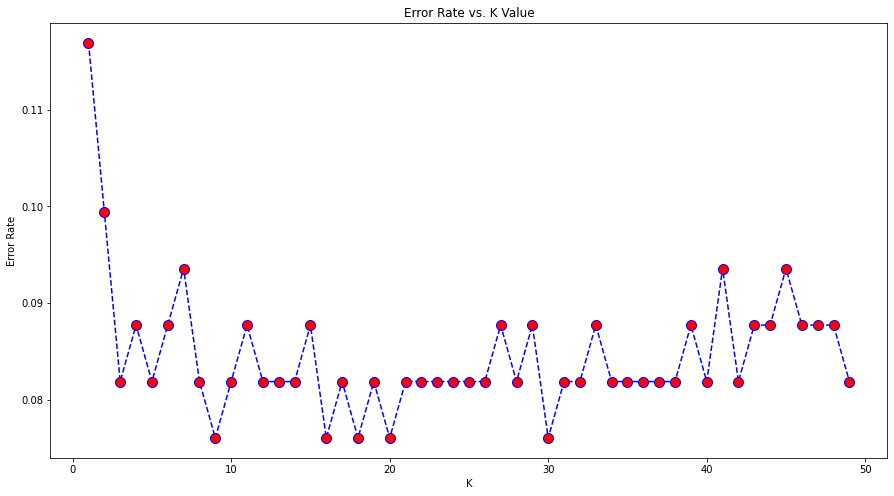

In [170]:
# Visualize the error rate
plt.figure(figsize=(15,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Identify the lowest error rate and modify the model

In [171]:
lowest_error_index = error_rate.index(min(error_rate))+1
print('Minimum Error Rate: ' + str(min(error_rate)))
print('Index position of Minimum Error Rate: ' + str(lowest_error_index))

Minimum Error Rate: 0.07602339181286549
Index position of Minimum Error Rate: 9


- Please note that the lowest values should be checked manually and picked a stable value. So, its not always the lowest values.

In [172]:
# Now with lowest_error_index
knn = KNeighborsClassifier(n_neighbors=lowest_error_index)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K = ' + str(lowest_error_index))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

WITH K = 9


Confusion Matrix:
[[65  6]
 [ 7 93]]


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        71
           1       0.94      0.93      0.93       100

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



## Test a sample

In [173]:
cancer_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [174]:
cancer_df['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [175]:
np.unique(cancer_df['target'])

array([0, 1])

In [176]:
flower_type = {0:'Malignant', 1:'Benign'}

flower_index = 7

y_test_np = np.array(y_test)

print(f'Actual --> {flower_type[y_test_np[flower_index]]}  --  Prediction --> {flower_type[pred[flower_index]]}')

Actual --> Benign  --  Prediction --> Benign
